
Total of Columns with Missing Values:
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

After Data Cleansing
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


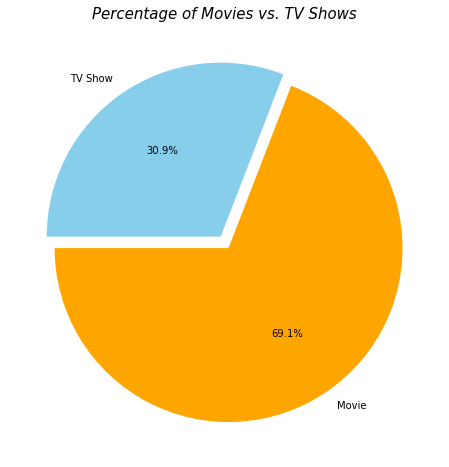

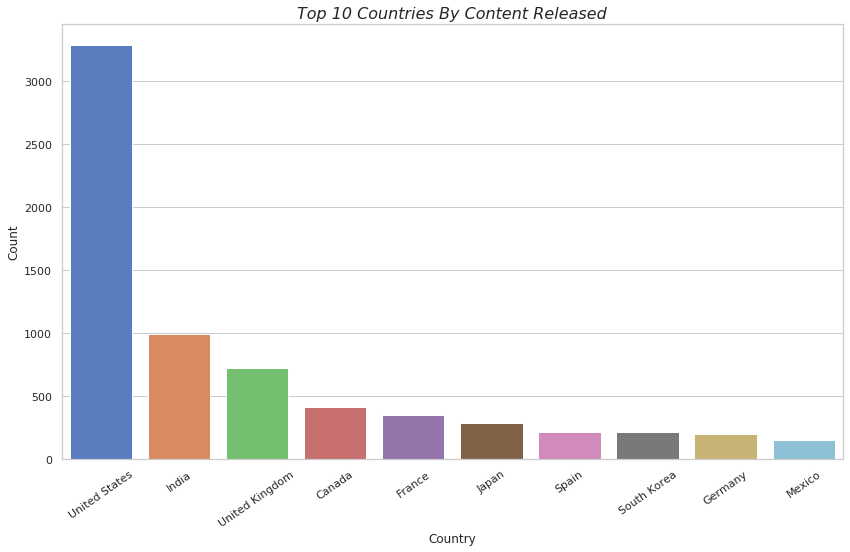

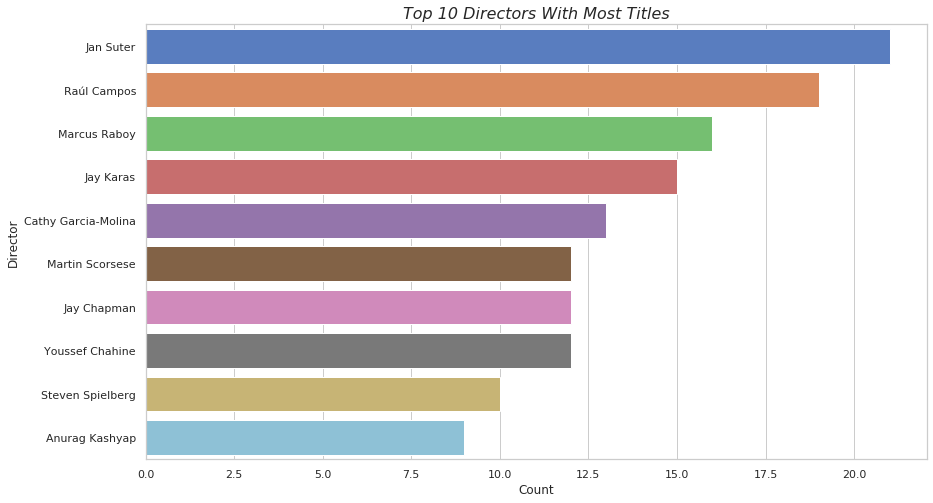

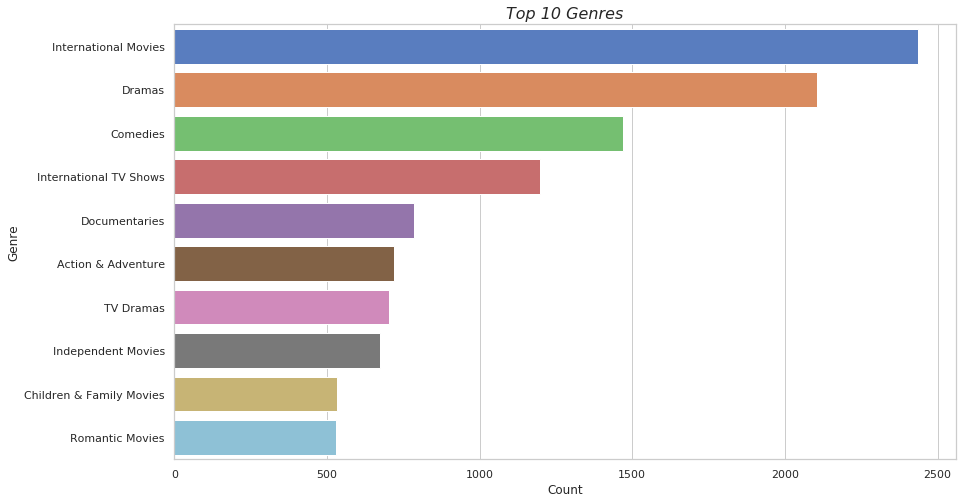

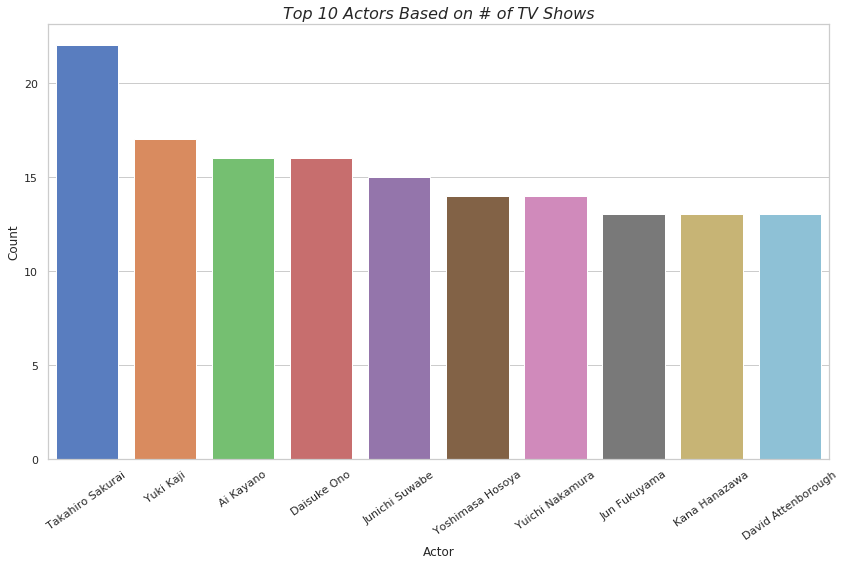

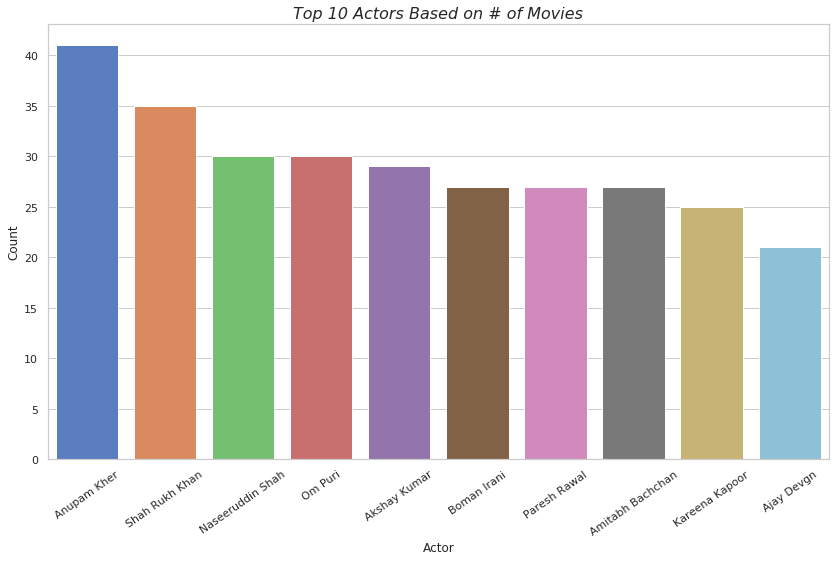

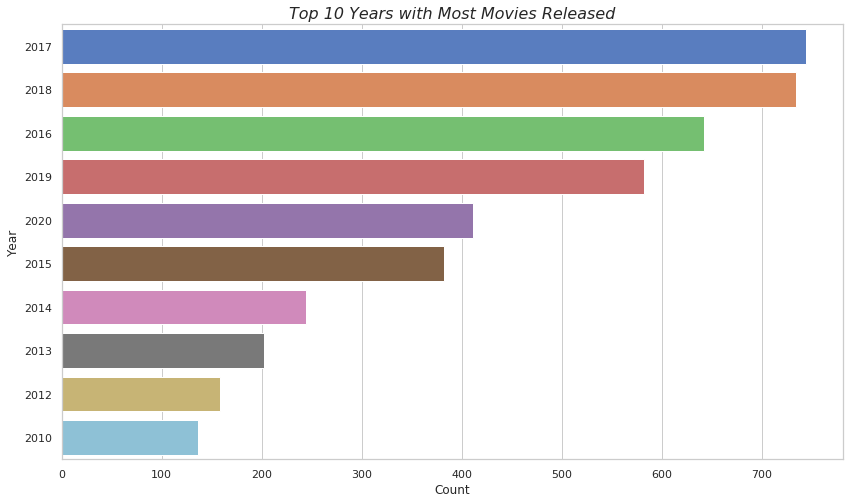

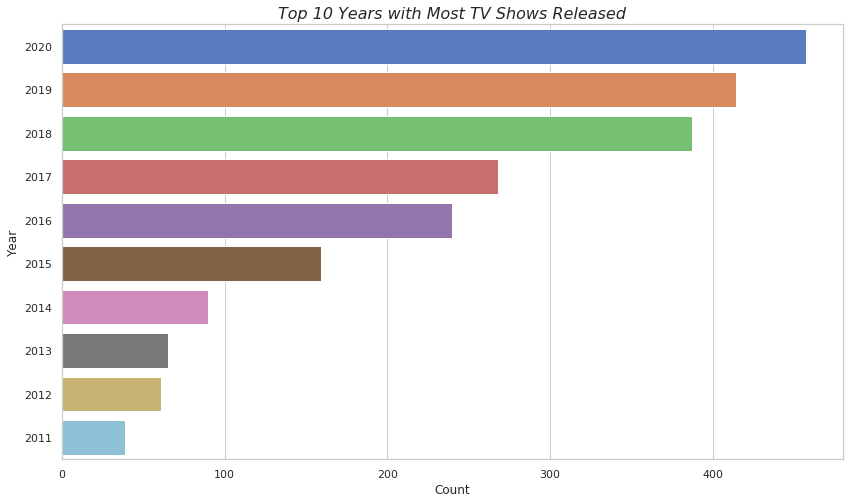

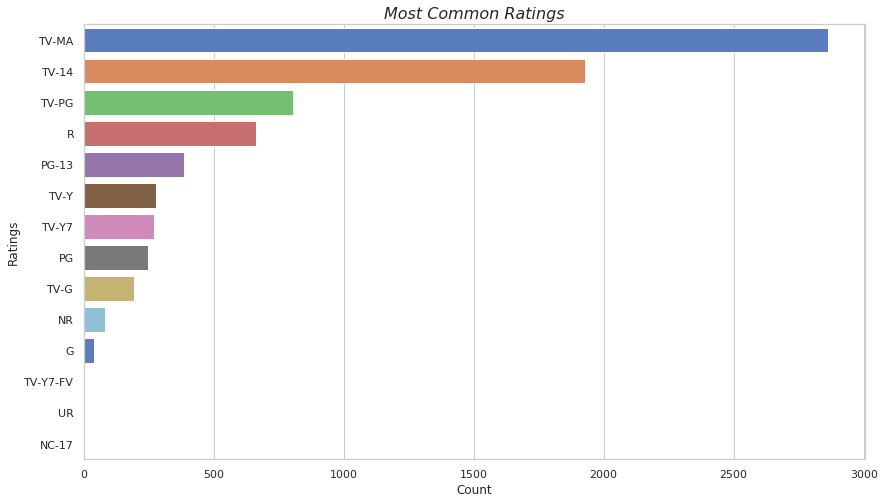

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
 
project_df = pd.read_csv("netflix_titles.csv")
movies_df = project_df[project_df.type.str.contains("Movie")]
shows_df = project_df[project_df.type.str.contains("TV Show")]
 
#Cleaning Data
print('\nTotal of Columns with Missing Values:') 
print(project_df.isnull().sum())
project_df.isnull().sum().sum()
project_df.director.fillna("No Director", inplace=True)
project_df.cast.fillna("No Cast", inplace=True)
project_df.country.fillna("Country Unavailable", inplace=True)
#Removing values with Null date_added and rating since there is little impact on data
project_df.dropna(subset=["date_added", "rating"], inplace=True)
 
print('\nAfter Data Cleansing') 
print(project_df.isnull().sum())
project_df.head()
 
#Percentage of movies vs shows
plt.figure(figsize=(14,8))
plt.title('Percentage of Movies vs. TV Shows', fontsize=15, fontstyle="oblique")
plt.pie(project_df.type.value_counts(),explode=(0.04,0.04), labels=project_df.type.value_counts().index, colors=['orange','skyblue'],autopct='%1.1f%%', startangle=180)
plt.show()
 
#Top 10 Countries Releasing Content
from collections import Counter
country = project_df['country']
country = country[country != 'Country Unavailable']
country_total = pd.Series(dict(Counter(','.join(country).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
top_countries = country_total.head(10)
plt.figure(figsize=(14,8))
sns.set(style="whitegrid")
sns.barplot(x= top_countries.index, y=top_countries, palette="muted")
plt.xticks(rotation=35)
plt.title('Top 10 Countries By Content Released', fontsize=16, fontstyle="oblique" )
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()
 
 
#Top 10 Director by Titles
direc_filter = project_df[project_df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(14,8))
plt.title('Top 10 Directors With Most Titles', fontsize=16, fontstyle="oblique" )
sns.countplot(y = direc_filter, palette="muted", order=direc_filter.value_counts().index[:10])
plt.xlabel('Count')
plt.ylabel('Director')
plt.show()
 
#Top 10 Genres
genre_filter = project_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(14,8))
sns.countplot(y = genre_filter, palette="muted", order=genre_filter.value_counts().index[:10])
plt.title('Top 10 Genres', fontsize=16, fontstyle="oblique" )
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()
 
#Top 10 Actors by # of TV Shows
show_filter = shows_df[shows_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(14,8))
plt.title('Top 10 Actors Based on # of TV Shows', fontsize=16, fontstyle="oblique" )
sns.countplot(x = show_filter, palette="muted", order=show_filter.value_counts().index[:10])
plt.xticks(rotation=35)
plt.xlabel('Actor')
plt.ylabel('Count')
plt.show()
 
#Top 10 Actors by # of Movies
movies_filter = movies_df[movies_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(14,8))
plt.title('Top 10 Actors Based on # of Movies', fontsize=16, fontstyle="oblique" )
sns.countplot(x = movies_filter, palette="muted", order=movies_filter.value_counts().index[:10])
plt.xticks(rotation=35)
plt.xlabel('Actor')
plt.ylabel('Count')
plt.show()
 
#Movies by Year
plt.figure(figsize=(14,8))
sns.countplot(y="release_year", data=movies_df, palette="muted", order=movies_df['release_year'].value_counts().index[:10])
plt.title('Top 10 Years with Most Movies Released', fontsize=16, fontstyle="oblique" )
plt.xlabel('Count')
plt.ylabel('Year')
plt.show()
 
#TV Shows by Year
plt.figure(figsize=(14,8))
sns.countplot(y="release_year", data=shows_df, palette="muted", order=shows_df['release_year'].value_counts().index[:10],)
plt.title('Top 10 Years with Most TV Shows Released', fontsize=16, fontstyle="oblique" )
plt.xlabel('Count')
plt.ylabel('Year')
plt.show()
 
#Common Ratings
plt.figure(figsize=(14,8))
sns.countplot(y="rating", data=project_df, palette="muted", order=project_df['rating'].value_counts().index[:14])
plt.title('Most Common Ratings', fontsize=16, fontstyle='oblique')
plt.xlabel('Count')
plt.ylabel('Ratings')
plt.show()
